In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [2]:
n_dots = 200
x1 = torch.linspace(-2, 2, n_dots).view(-1, 1)
x2 = torch.linspace(-2, 2, n_dots).view(-1, 1)
y_data = (1 + torch.sin(2* x1 + 3 * x2))/(3.5 + torch.sin(x1 -x2)) + 0.1 * torch.randn(x1.size())
x_data = torch.cat((x1, x2), -1)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2,shuffle=True)

In [4]:
class net_structure(nn.Module):
    def __init__(self,input_num,hidden_num,output_num):
        super(net_structure,self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_num, hidden_num),
            nn.ReLU(),
            nn.Linear(hidden_num, output_num),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.net(input)
        
net = net_structure(2,15,1)

In [5]:
print(net.state_dict().keys())

odict_keys(['net.0.weight', 'net.0.bias', 'net.2.weight', 'net.2.bias'])


In [6]:
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [7]:
max_epoch = 300
iter_loss = []
batch_loss = []
for i in range(max_epoch):
    for n in range(x_train.shape[0]):
        input = Variable(torch.FloatTensor(x_train[n, :]))
        output = Variable(torch.FloatTensor(y_train[n, :]))

        predict = net(input)
        loss = criterion(predict, output)
        batch_loss.append(loss.data.numpy())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    iter_loss.append(np.average(np.array(batch_loss)))

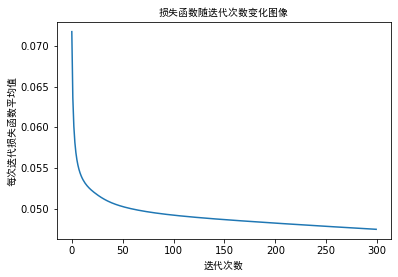

In [8]:
from matplotlib.font_manager import FontProperties
x = np.arange(max_epoch)
y = np.array(iter_loss)
#为了能显示中文
myfont = FontProperties(fname='C:/Windows/Fonts/simhei.ttf')
plt.plot(x, y)
plt.title('损失函数随迭代次数变化图像', fontproperties=myfont)
plt.xlabel('迭代次数', fontproperties=myfont)
plt.ylabel('每次迭代损失函数平均值', fontproperties=myfont)
plt.show()

In [9]:
predict_ass = []
for i in range(x_test.shape[0]):
    input = Variable(torch.FloatTensor(x_test[i, :]))
    predict_ass.append(net(input).detach().numpy())

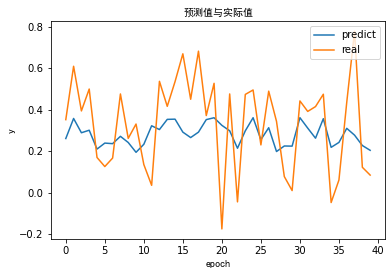

In [10]:
x = np.arange(x_test.shape[0])
y1 = np.array(predict_ass)
y2 = np.array(y_test)
myfont = FontProperties(fname='C:/Windows/Fonts/simhei.ttf')
line1, = plt.plot(x, y1)
line2, = plt.plot(x, y2)
plt.legend([line1, line2], ["predict", "real"], loc=1)
plt.title('预测值与实际值', fontproperties=myfont)
plt.xlabel('epoch', fontproperties=myfont)
plt.ylabel('y', fontproperties=myfont)
plt.show()